In [2]:
import os 

os.environ['SCIPY_ARRAY_API'] = '1'
os.environ['SKLEARN_ARRAY_API_DISPATCH'] = 'True'

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

import catboost as cap
from scipy import stats
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE


In [4]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [6]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
sns.set(style='whitegrid')

In [7]:
df = pd.read_csv(r"C:/Users/ASUS/OneDrive/Desktop/Aviation-damage-prediction/data/AviationData.csv", 
                 encoding='windows-1252')

df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0          NaN        Fatal(2)       Destroyed               NaN   
1          NaN        Fatal(4)       Destroyed               NaN   
2          NaN        Fatal(3)       Destroyed               NaN   
3          NaN        Fatal(2)       Destroyed               NaN   
4          NaN        Fatal(1)       Destroyed               NaN   

  Registration.Number      Make     Model Amateur.Built  Number.of.Engines  \
0              NC6404   Stinson     108-3            No                1.0   
1              N5069P     Piper  PA24-180            No                1.0   
2              N5142R    Cessna      172M            No                1.0   
3              N1168J  Rockwell       112            No                1.0   
4               N15NY    Cessna       501            No                NaN   

     Engine.Type FAR.Description Schedule Purpose.of.flight Air.carrier  \
0  Reciprocating             NaN      NaN          Personal         NaN   
1  Reciprocating             NaN      NaN          Personal         NaN   
2  Reciprocating             NaN      NaN          Personal         NaN   
3  Reciprocating             NaN      NaN          Personal         NaN   
4            NaN             NaN      NaN          Personal         NaN   

   Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     NaN                   NaN   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   NaN   

   Total.Uninjured Weather.Condition Broad.phase.of.flight   Report.Status  \
0              0.0               UNK                Cruise  Probable Cause   
1              0.0               UNK               Unknown  Probable Cause   
2              NaN               IMC                Cruise  Probable Cause   
3              0.0               IMC                Cruise  Probable Cause   
4              0.0               VMC              Approach  Probable Cause   

  Publication.Date  
0              NaN  
1       19-09-1996  
2       26-02-2007  
3       12-09-2000  
4       16-04-1980

In [8]:
df.tail()

Event.Id Investigation.Type Accident.Number  Event.Date  \
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

            Location        Country Latitude Longitude Airport.Code  \
88884  Annapolis, MD  United States      NaN       NaN          NaN   
88885    Hampton, NH  United States      NaN       NaN          NaN   
88886     Payson, AZ  United States  341525N  1112021W          PAN   
88887     Morgan, UT  United States      NaN       NaN          NaN   
88888     Athens, GA  United States      NaN       NaN          NaN   

      Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
88884          NaN           Minor             NaN               NaN   
88885          NaN             NaN             NaN               NaN   
88886       PAYSON       Non-Fatal     Substantial          Airplane   
88887          NaN             NaN             NaN               NaN   
88888          NaN           Minor             NaN               NaN   

      Registration.Number                        Make      Model  \
88884              N1867H                       PIPER  PA-28-151   
88885              N2895Z                    BELLANCA       7ECA   
88886              N749PJ  AMERICAN CHAMPION AIRCRAFT      8GCBC   
88887              N210CU                      CESSNA       210N   
88888              N9026P                       PIPER  PA-24-260   

      Amateur.Built  Number.of.Engines Engine.Type FAR.Description Schedule  \
88884            No                NaN         NaN             091      NaN   
88885            No                NaN         NaN             NaN      NaN   
88886            No                1.0         NaN             091      NaN   
88887            No                NaN         NaN             091      NaN   
88888            No                NaN         NaN             091      NaN   

      Purpose.of.flight         Air.carrier  Total.Fatal.Injuries  \
88884          Personal                 NaN                   0.0   
88885               NaN                 NaN                   0.0   
88886          Personal                 NaN                   0.0   
88887          Personal  MC CESSNA 210N LLC                   0.0   
88888          Personal                 NaN                   0.0   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
88884                     1.0                   0.0              0.0   
88885                     0.0                   0.0              0.0   
88886                     0.0                   0.0              1.0   
88887                     0.0                   0.0              0.0   
88888                     1.0                   0.0              1.0   

      Weather.Condition Broad.phase.of.flight Report.Status Publication.Date  
88884               NaN                   NaN           NaN       29-12-2022  
88885               NaN                   NaN           NaN              NaN  
88886               VMC                   NaN           NaN       27-12-2022  
88887               NaN                   NaN           NaN              NaN  
88888               NaN                   NaN           NaN       30-12-2022

In [10]:
info_dict = {
    'column' : df.columns.tolist(),
    'non-null count': df.count().tolist(),
    'dtype': df.dtypes.tolist(),
    'null-percentage': np.round(( 87282 - df.count()) * 100/87282)
}

descriptn = pd.DataFrame(info_dict).reset_index().drop('index', axis=1)
descriptn

column  non-null count    dtype  null-percentage
0                 Event.Id           88889   object             -2.0
1       Investigation.Type           88889   object             -2.0
2          Accident.Number           88889   object             -2.0
3               Event.Date           88889   object             -2.0
4                 Location           88837   object             -2.0
5                  Country           88663   object             -2.0
6                 Latitude           34382   object             61.0
7                Longitude           34373   object             61.0
8             Airport.Code           50132   object             43.0
9             Airport.Name           52704   object             40.0
10         Injury.Severity           87889   object             -1.0
11         Aircraft.damage           85695   object              2.0
12       Aircraft.Category           32287   object             63.0
13     Registration.Number           87507   object             -0.0
14                    Make           88826   object             -2.0
15                   Model           88797   object             -2.0
16           Amateur.Built           88787   object             -2.0
17       Number.of.Engines           82805  float64              5.0
18             Engine.Type           81793   object              6.0
19         FAR.Description           32023   object             63.0
20                Schedule           12582   object             86.0
21       Purpose.of.flight           82697   object              5.0
22             Air.carrier           16648   object             81.0
23    Total.Fatal.Injuries           77488  float64             11.0
24  Total.Serious.Injuries           76379  float64             12.0
25    Total.Minor.Injuries           76956  float64             12.0
26         Total.Uninjured           82977  float64              5.0
27       Weather.Condition           84397   object              3.0
28   Broad.phase.of.flight           61724   object             29.0
29           Report.Status           82505   object              5.0
30        Publication.Date           75118   object             14.0

In [11]:
df.describe(include='object', exclude=np.number)

Event.Id Investigation.Type Accident.Number  Event.Date  \
count            88889              88889           88889       88889   
unique           87951                  2           88863       14782   
top     20001214X45071           Accident      ERA22LA103  1982-05-16   
freq                 3              85015               2          25   

             Location        Country Latitude Longitude Airport.Code  \
count           88837          88663    34382     34373        50132   
unique          27758            219    25592     27156        10374   
top     ANCHORAGE, AK  United States  332739N  0112457W         NONE   
freq              434          82248       19        24         1488   

       Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
count         52704           87889           85695             32287   
unique        24870             109               4                15   
top         Private       Non-Fatal     Substantial          Airplane   
freq            240           67357           64148             27617   

       Registration.Number    Make  Model Amateur.Built    Engine.Type  \
count                87507   88826  88797         88787          81793   
unique               79104    8237  12318             2             12   
top                   NONE  Cessna    152            No  Reciprocating   
freq                   344   22227   2367         80312          69530   

       FAR.Description Schedule Purpose.of.flight Air.carrier  \
count            32023    12582             82697       16648   
unique              31        3                26       13590   
top                091     NSCH          Personal       Pilot   
freq             18221     4474             49448         258   

       Weather.Condition Broad.phase.of.flight   Report.Status  \
count              84397                 61724           82505   
unique                 4                    12           17074   
top                  VMC               Landing  Probable Cause   
freq               77303                 15428           61754   

       Publication.Date  
count             75118  
unique             2924  
top          25-09-2020  
freq              17019

In [13]:
null_values = pd.DataFrame()
null_values['columns'] = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

null_values['null_values'] = df.isnull().sum()[df.isnull().sum() > 0].values.tolist()

null_values

columns  null_values
0                 Location           52
1                  Country          226
2                 Latitude        54507
3                Longitude        54516
4             Airport.Code        38757
5             Airport.Name        36185
6          Injury.Severity         1000
7          Aircraft.damage         3194
8        Aircraft.Category        56602
9      Registration.Number         1382
10                    Make           63
11                   Model           92
12           Amateur.Built          102
13       Number.of.Engines         6084
14             Engine.Type         7096
15         FAR.Description        56866
16                Schedule        76307
17       Purpose.of.flight         6192
18             Air.carrier        72241
19    Total.Fatal.Injuries        11401
20  Total.Serious.Injuries        12510
21    Total.Minor.Injuries        11933
22         Total.Uninjured         5912
23       Weather.Condition         4492
24   Broad.phase.of.flight        27165
25           Report.Status         6384
26        Publication.Date        13771

In [15]:
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy='most_frequent')
Imputer.fit(df.select_dtypes('object'))

DF = pd.DataFrame(Imputer.transform(df.select_dtypes('object')), columns = df.select_dtypes ( 'object' ).columns )

In [16]:
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace = True)

In [18]:
Imputer = SimpleImputer(strategy='mean')
Imputer.fit(df.select_dtypes(np.number))
DF_1 = pd.DataFrame(Imputer.transform(df.select_dtypes(np.number)),columns= df.select_dtypes(np.number).columns)

In [19]:
df = pd.concat([DF, DF_1], axis=1)
df

Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States    332739N   0112457W         NONE   
1       BRIDGEPORT, CA  United States    332739N   0112457W         NONE   
2        Saltville, VA  United States  36.922223 -81.878056         NONE   
3           EUREKA, CA  United States    332739N   0112457W         NONE   
4           Canton, OH  United States    332739N   0112457W         NONE   
...                ...            ...        ...        ...          ...   
88884    Annapolis, MD  United States    332739N   0112457W         NONE   
88885      Hampton, NH  United States    332739N   0112457W         NONE   
88886       Payson, AZ  United States    341525N   1112021W          PAN   
88887       Morgan, UT  United States    332739N   0112457W         NONE   
88888       Athens, GA  United States    332739N   0112457W         NONE   

      Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0          Private        Fatal(2)       Destroyed          Airplane   
1          Private        Fatal(4)       Destroyed          Airplane   
2          Private        Fatal(3)       Destroyed          Airplane   
3          Private        Fatal(2)       Destroyed          Airplane   
4          Private        Fatal(1)       Destroyed          Airplane   
...            ...             ...             ...               ...   
88884      Private           Minor     Substantial          Airplane   
88885      Private       Non-Fatal     Substantial          Airplane   
88886       PAYSON       Non-Fatal     Substantial          Airplane   
88887      Private       Non-Fatal     Substantial          Airplane   
88888      Private           Minor     Substantial          Airplane   

      Registration.Number                        Make      Model  \
0                  NC6404                     Stinson      108-3   
1                  N5069P                       Piper   PA24-180   
2                  N5142R                      Cessna       172M   
3                  N1168J                    Rockwell        112   
4                   N15NY                      Cessna        501   
...                   ...                         ...        ...   
88884              N1867H                       PIPER  PA-28-151   
88885              N2895Z                    BELLANCA       7ECA   
88886              N749PJ  AMERICAN CHAMPION AIRCRAFT      8GCBC   
88887              N210CU                      CESSNA       210N   
88888              N9026P                       PIPER  PA-24-260   

      Amateur.Built    Engine.Type FAR.Description Schedule Purpose.of.flight  \
0                No  Reciprocating             091     NSCH          Personal   
1                No  Reciprocating             091     NSCH          Personal   
2                No  Reciprocating             091     NSCH          Personal   
3                No  Reciprocating             091     NSCH          Personal   
4                No  Reciprocating             091     NSCH          Personal   
...             ...            ...             ...      ...        

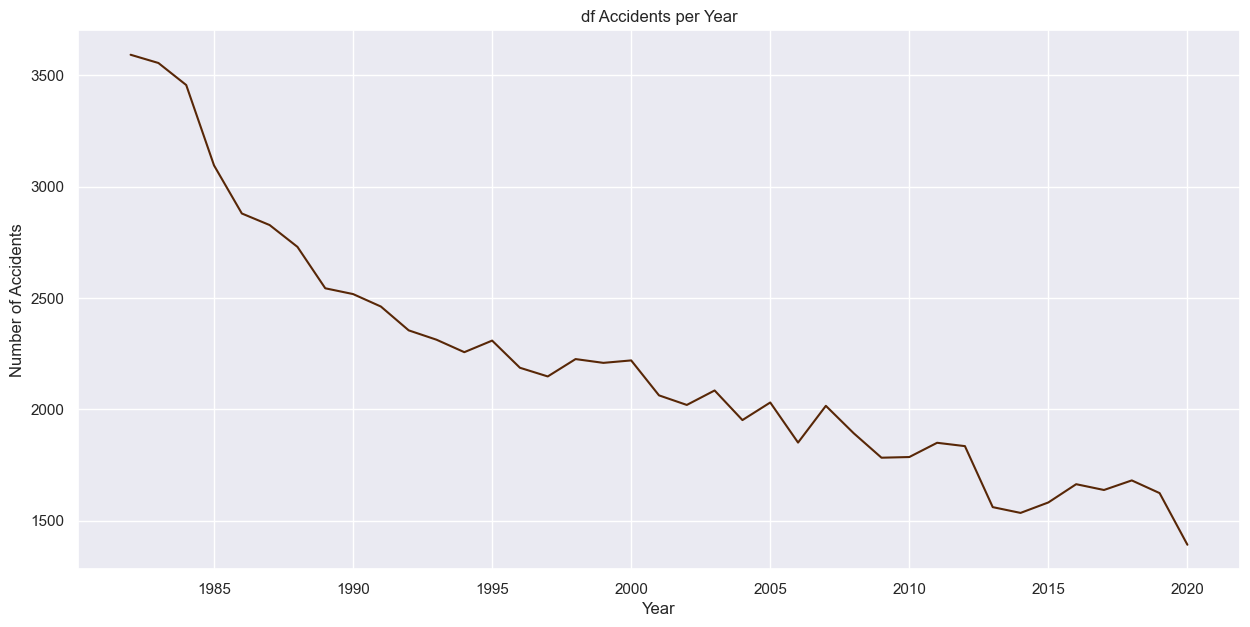

In [22]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year

Accidents = df.groupby(['Year'], as_index = False)['Event.Id'].count()

Accidents = Accidents[(Accidents['Year'] >= 1982) & (Accidents['Year'] <= 2020)]

plt.style.use( "seaborn-v0_8-dark" )

plt.figure(figsize = (15 , 7))

sns.set(style = 'darkgrid' )

sns.lineplot(x = 'Year', y = 'Event.Id', data = Accidents, color = '#582707' , markers = '*' )

plt.xlabel ('Year')
plt.ylabel('Number of Accidents')
plt.title('df Accidents per Year')
plt.show()

In [31]:
Incident = df[df['Investigation.Type']=='Incident']

Incident_injuries = Incident.groupby('Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()

Engine_Damage = pd.DataFrame(df[ 'Number.of.Engines'  ].groupby ( df[ 'Aircraft.damage'  ] ).value_counts ( ))


In [35]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Amateur.Built', 'Engine.Type', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition',
       'Broad.phase.of.flight', 'Number.of.Engines', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Year'],
      dtype='object')

In [39]:
for i in df :
    if df[i].dtype == 'object': 
        df[i] = df[i].str.title()
        
        if 'Unknown' in df[i].values: 
            df[i].replace({'Unknown':df[i].mode()[0]} , inplace = True)
            

df['Aircraft.damage'].replace({'Substantial': 1,'Minor' : 0,'Destroyed' : 2},inplace = True)

In [40]:
Categorical_Data = df.select_dtypes ( 'object' ).columns.to_list ( )

Categorical_Data

['Event.Id',
 'Investigation.Type',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.Category',
 'Make',
 'Amateur.Built',
 'Engine.Type',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [43]:
LE = LabelEncoder()

df[Categorical_Data] = df[Categorical_Data].apply(LE.fit_transform)

df

Event.Id  Investigation.Type Event.Date  Location  Country  \
0         45208                   0 1948-10-24     12924      203   
1         45211                   0 1962-07-19      2341      203   
2         60529                   0 1974-08-30     17279      203   
3         45212                   0 1977-06-19      6120      203   
4         56803                   0 1979-08-02      2965      203   
...         ...                 ...        ...       ...      ...   
88884     87944                   0 2022-12-26       638      203   
88885     87945                   0 2022-12-26      8006      203   
88886     87947                   0 2022-12-26     15164      203   
88887     87948                   0 2022-12-26     12963      203   
88888     87950                   0 2022-12-29       916      203   

       Airport.Code  Airport.Name  Injury.Severity  Aircraft.damage  \
0              7812         15614               42                2   
1              7812         15614               68                2   
2              7812         15614               60                2   
3              7812         15614               42                2   
4              7812         15614                1                2   
...             ...           ...              ...              ...   
88884          7812         15614              105                1   
88885          7812         15614              106                1   
88886          8374         14804              106                1   
88887          7812         15614              106                1   
88888          7812         15614              105                1   

       Aircraft.Category  Make  Amateur.Built  Engine.Type  Schedule  \
0                      0  6575              0            5         0   
1                      0  5276              0            5         0   
2                      0  1259              0            5         0   
3                      0  5774              0            5         0   
4                      0  1259              0            5         0   
...                  ...   ...            ...          ...       ...   
88884                  0  5276              0            5         0   
88885                  0   688              0            5         0   
88886                  0   287              0            5         0   
88887                  0  1259              0            5         0   
88888                  0  5276              0            5         0   

       Purpose.of.flight  Air.carrier  Weather.Condition  \
0                     16         9397                  1   
1                     16         9397                  1   
2                     16         9397                  0   
3                     16         9397                  0   
4                     16         9397                  2   
...                  ...          ...                ...   
88884                 16         9397                  2   
88885                 16         9397                  2   
88886                 16         9397                  2   
88887                 16         7875                  2   
88888                 16         9397                  2   

       Broad.phase.of.flight  Number.of.Engines  Total.Fatal.Injuries  \
0                          2                1.0                   2.0   
1                          5                1.0                   4.0   
2                          2                1.0                   3.0   
3                          2                1.0                   2.0   
4                          0                1.0                   1.0   
...                      ...                ...                   ...   
88884                      5                1.0                   0.0   
88885                      5                1.0                   0.0   
88886                      5                1.0                   0.0   
88887    

<Axes: >

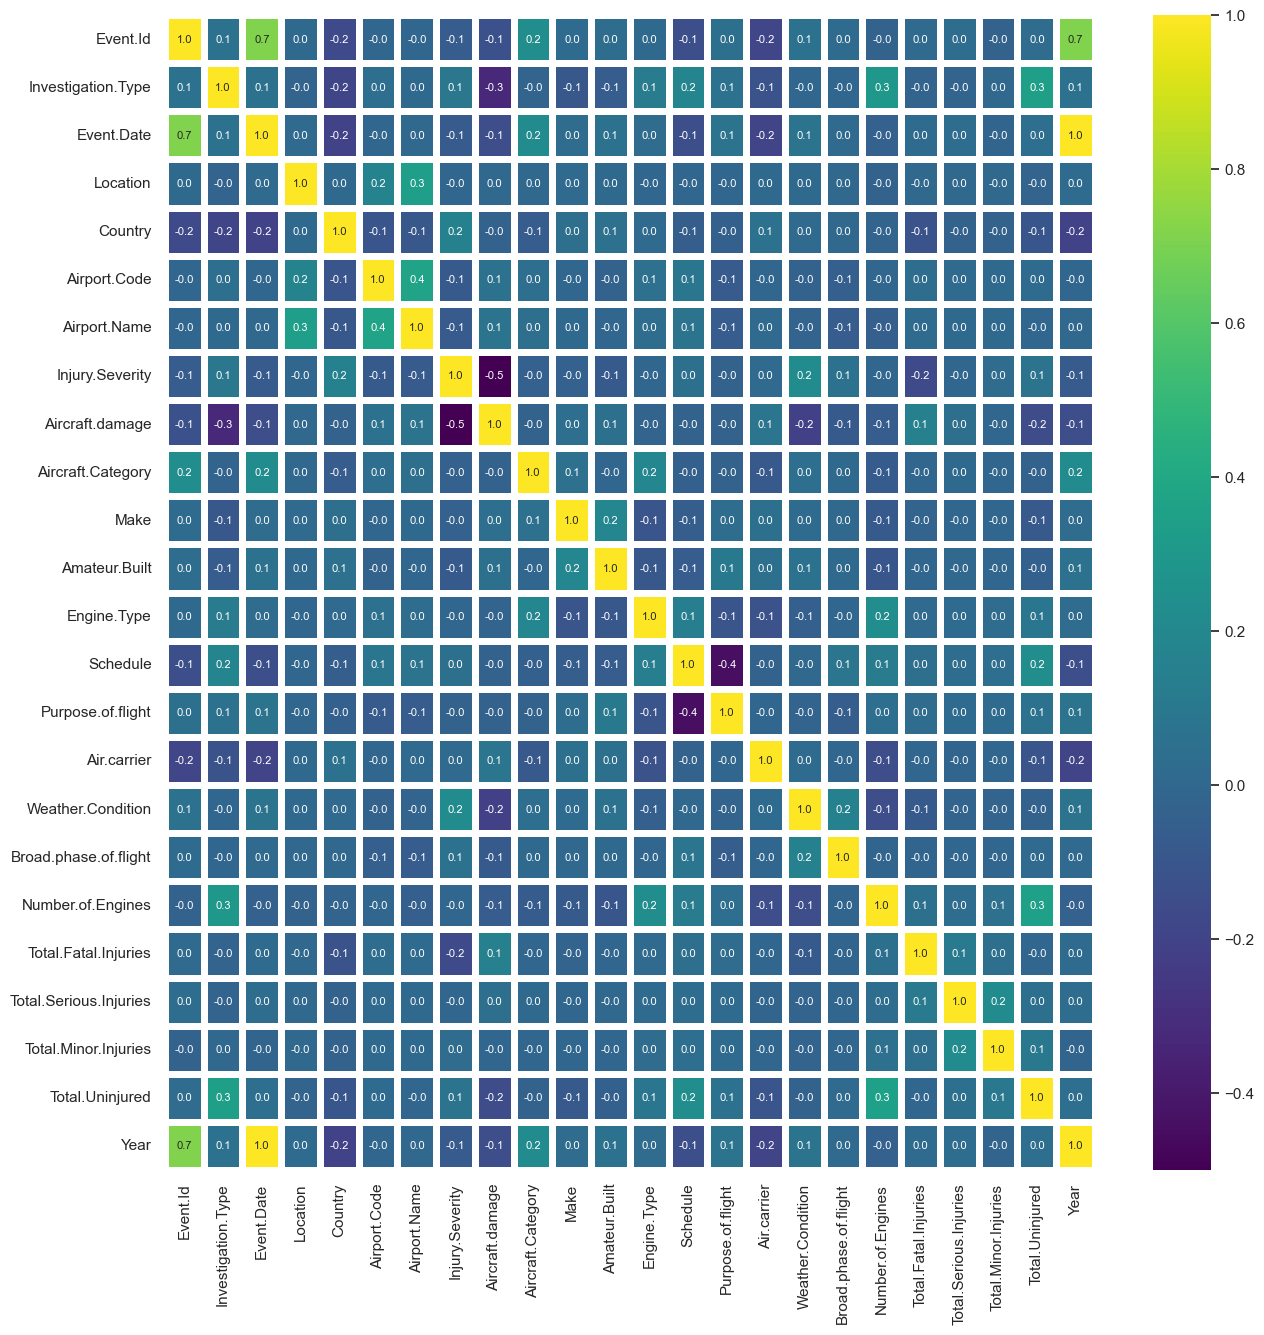

In [44]:
correlation = df.corr()
plt.figure(figsize=(15, 15))

sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=5, fmt='.1f', cbar=True, annot_kws = {"size": 8})

In [45]:
Discrete_Columns = [ 'Number.of.Engines' , 'Total.Fatal.Injuries' , 'Total.Minor.Injuries' , 'Total.Serious.Injuries' , 'Total.Uninjured' ]

df[Discrete_Columns].describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Minor.Injuries  \
count       88889.000000          88889.000000          88889.000000   
mean            1.136552              0.647855              0.357061   
std             0.432545              5.122070              2.080156   
min             0.000000              0.000000              0.000000   
25%             1.000000              0.000000              0.000000   
50%             1.000000              0.000000              0.000000   
75%             1.000000              0.647855              0.357061   
max             8.000000            349.000000            380.000000   

       Total.Serious.Injuries  Total.Uninjured  
count            88889.000000     88889.000000  
mean                 0.279881         5.325440  
std                  1.431309        26.969386  
min                  0.000000         0.000000  
25%                  0.000000         0.000000  
50%                  0.000000         1.000000  
75%                  0.279881         2.000000  
max                161.000000       699.000000

In [47]:
percentile_threshold = 95 
for column in Discrete_Columns:
    
    threshold = np.percentile(df[column], percentile_threshold)
    df = df[ df [column] <= threshold ]

df[Discrete_Columns].describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Minor.Injuries  \
count       72801.000000          72801.000000          72801.000000   
mean            1.081070              0.333742              0.179037   
std             0.319845              0.572831              0.339293   
min             0.000000              0.000000              0.000000   
25%             1.000000              0.000000              0.000000   
50%             1.000000              0.000000              0.000000   
75%             1.000000              0.647855              0.357061   
max             2.000000              2.000000              1.000000   

       Total.Serious.Injuries  Total.Uninjured  
count            72801.000000     72801.000000  
mean                 0.149540         1.432745  
std                  0.313274         1.444125  
min                  0.000000         0.000000  
25%                  0.000000         0.000000  
50%                  0.000000         1.000000  
75%                  0.279881         2.000000  
max                  1.000000         5.325440

In [50]:

New_df = df.drop ( [ 'Event.Date'  , 'Aircraft.damage' ] , axis = 1 ) 

VIF_Scores = pd.DataFrame ( ) 

VIF_Scores[ "Feature" ] = New_df.columns

VIF_Scores[ "VIF" ] = [ variance_inflation_factor ( New_df.values, i ) for i in range( New_df.shape [ 1 ] ) ]

print(VIF_Scores)

threshold = 15

selected_features = VIF_Scores [ VIF_Scores [ 'VIF' ] < threshold ] [ 'Feature' ].values

NEW_df_X = New_df [ selected_features ]

                   Feature         VIF
0                 Event.Id    4.897623
1       Investigation.Type    1.166569
2                 Location    4.496336
3                  Country   54.328326
4             Airport.Code    9.760913
5             Airport.Name    8.734178
6          Injury.Severity   18.935900
7        Aircraft.Category    1.183410
8                     Make    2.885611
9            Amateur.Built    1.230843
10             Engine.Type   38.393524
11                Schedule    1.605451
12       Purpose.of.flight   16.014295
13             Air.carrier   26.747508
14       Weather.Condition   20.138556
15   Broad.phase.of.flight    5.279240
16       Number.of.Engines   13.608937
17    Total.Fatal.Injuries    3.636753
18  Total.Serious.Injuries    1.292598
19    Total.Minor.Injuries    1.357213
20         Total.Uninjured    2.158438
21                    Year  216.249627


In [52]:
df = pd.concat ( [ NEW_df_X , df [ 'Aircraft.damage' ] ] , axis = 1 )

df [ 'Aircraft.damage' ].replace ( { 1 : 0 , 2 : 1 } , inplace = True )

In [53]:
Train, Test = train_test_split(df, test_size=0.2, random_state=42)
Train_X = Train.drop(['Aircraft.damage'], axis=1)
Train_Y = Train['Aircraft.damage']
Test_X = Test.drop(['Aircraft.damage'], axis=1)
Test_Y = Test['Aircraft.damage']

In [54]:
Test_Y.value_counts()

Aircraft.damage
0    11972
1     2589
Name: count, dtype: int64

In [56]:
from sklearn.metrics import recall_score

In [57]:
#Logistic Regression
Lr = LogisticRegression()
Lr.fit(Train_X, Train_Y)

Y_Lr = Lr.predict(Test_X)

Accuracy_Lr = accuracy_score(Test_Y, Y_Lr) * 100

Precision_Lr = precision_score(Test_Y, Y_Lr) * 100

Recall_Lr = recall_score(Test_Y, Y_Lr) * 100

F1_Score_Lr = f1_score(Test_Y, Y_Lr) * 100

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_Lr , Precision_Lr , Recall_Lr , F1_Score_Lr) )

Accuracy = 87.67941762241604%

Precision = 78.74186550976138%

Recall = 42.06257242178447%

F1 Score = 54.833836858006045%


Text(0.5, 1.0, 'Confusion Matrix')

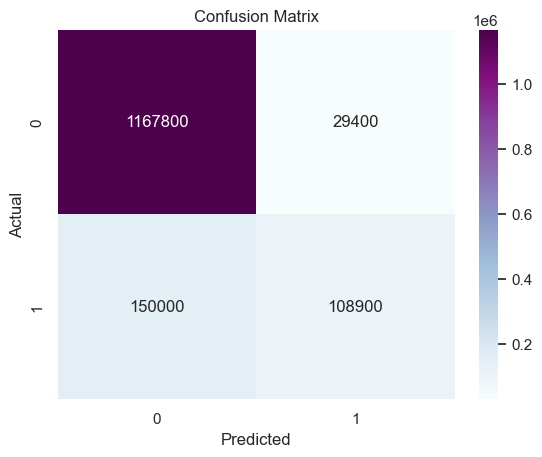

In [58]:
Confusion_Matrix_LR = confusion_matrix ( Test_Y , Y_Lr ) * 100

sns.heatmap ( Confusion_Matrix_LR , annot = True , fmt='.0f' , cmap = 'BuPu' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [59]:
train_predictions = Lr.predict(Train_X)

test_predictions = Lr.predict(Test_X)

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100

# If the values are close by or in the same vicinity then there is no overfitting ocurrinabsg

print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 87.6356456043956

Test Accuracy >> 87.67941762241604


In [60]:
# Create the under samplier instance 

undersampler = RandomUnderSampler ( random_state = 42 )

# Undersample the majority class

Train_X, Train_Y = undersampler.fit_resample ( Train_X , Train_Y )

Test_X, Test_Y = undersampler.fit_resample ( Test_X , Test_Y )

print ( "\nTrain >> {} , Test >> {}\n\nTrain_X >> {} , Train_Y >> {}\n\nTest_X >> {} , Test_Y >> {}".format ( Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape) )


Train >> (58240, 16) , Test >> (14561, 16)

Train_X >> (21540, 15) , Train_Y >> (21540,)

Test_X >> (5178, 15) , Test_Y >> (5178,)


In [61]:
display ( Train_Y.value_counts ( ) )

Test_Y.value_counts ( )

Aircraft.damage
0    10770
1    10770
Name: count, dtype: int64

Aircraft.damage
0    2589
1    2589
Name: count, dtype: int64

In [62]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    
    'criterion': ['gini', 'entropy'],
    
    'max_depth': [ 5, 10, 15, 20],
    
    'min_samples_split': [ 5, 10],
    
 }


# Initializing the algorithm

DT = DecisionTreeClassifier()


# Performing grid search, which finds the appropriate parameter iteratively.

grid_search = GridSearchCV ( DT, Parameters, cv = 5 )

grid_search.fit ( Train_X ,Train_Y )

Params = grid_search.best_params_

# Printing the best parameters 

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}

Best Accuracy Score:  0.8298514391829155


In [63]:
# Initializing Decision Tree Algorithm with the best parameters

DT = DecisionTreeClassifier ( **Params )


# Training the decision tree algorithm on train data

DT.fit ( Train_X ,Train_Y )


# Predicting the target variables on unseen data / test data

threshold = 0.333

Y_DT = DT.predict_proba(Test_X)[:, 1] >= threshold

# Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_DT = accuracy_score( Test_Y , Y_DT ) * 100 

Precision_DT = precision_score ( Test_Y , Y_DT ) * 100 

Recall_DT = recall_score ( Test_Y , Y_DT ) * 100

F1_Score_DT = f1_score ( Test_Y , Y_DT ) * 100

print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {} %\n\nPrecision = {} %\n\nRecall = {} %\n\nF1 Score = {} %".format ( Accuracy_DT  , Precision_DT  , Recall_DT  , F1_Score_DT ) )

The performance metrics of the Test Data is : 

Accuracy = 81.80764774044033 %

Precision = 79.46332737030411 %

Recall = 85.7860177674778 %

F1 Score = 82.5037147102526 %


Text(0.5, 1.0, 'Confusion Matrix')

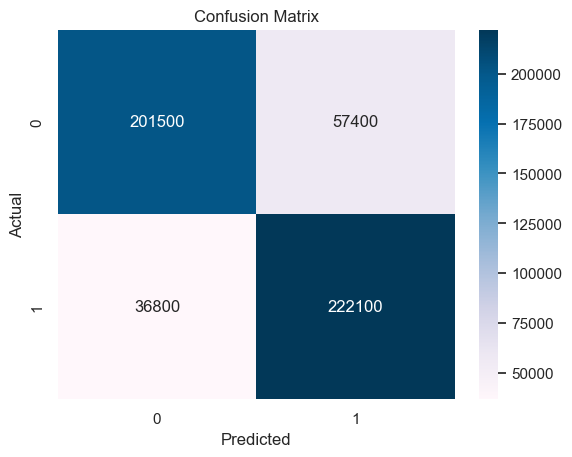

In [64]:
Confusion_Matrix_DT = confusion_matrix ( Test_Y , Y_DT ) * 100

sns.heatmap ( Confusion_Matrix_DT , annot = True , fmt='.0f' , cmap = 'PuBu' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [65]:
#random forest classifier
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    
    'n_estimators': [ 100 , 300 , 500 ], # Number of trees in the forest
    
    'max_depth': [None, 5 , 10 , 15 ], # Maximum depth of each tree
    
    'min_samples_split': [ 5 , 10 , 15]  # Minimum number of samples required to split an internal node    
}

# Create a RandomForestClassifier instance

RF = RandomForestClassifier ( )


# Perform grid search with cross-validation

grid_search = GridSearchCV ( RF, Parameters, cv = 5)

grid_search.fit ( Train_X ,Train_Y )

Params = grid_search.best_params_

# Training model for each combination of the parameters

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}

Best Accuracy Score:  0.8370473537604457


In [66]:
# Create a Random Forest classifier with specified hyperparameters

RF = RandomForestClassifier ( **Params )


# Train the Random Forest classifier on the training data

RF.fit ( Train_X ,Train_Y )


# Use the trained classifier to predict the labels for the test data

Y_RF = RF.predict ( Test_X )

threshold = 0.333

Y_RF = RF.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_RF = accuracy_score( Test_Y , Y_RF ) * 100 

Precision_RF = precision_score ( Test_Y , Y_RF ) * 100 

Recall_RF = recall_score ( Test_Y , Y_RF ) * 100

F1_Score_RF = f1_score ( Test_Y , Y_RF ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_RF  , Precision_RF  , Recall_RF  , F1_Score_RF ) )

The performance metrics of the Test Data is : 

Accuracy = 82.1166473541908%

Precision = 79.12434325744309%

Recall = 87.25376593279258%

F1 Score = 82.99044819985305%


Text(0.5, 1.0, 'Confusion Matrix')

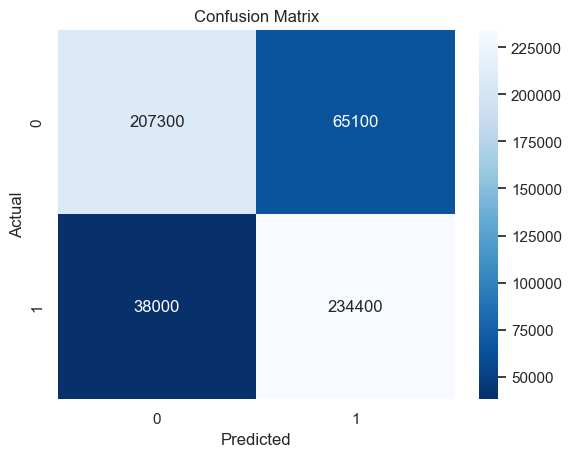

In [ ]:
Confusion_Matrix_RF = confusion_matrix ( Test_Y , Y_RF ) * 100

sns.heatmap ( Confusion_Matrix_RF , annot = True , fmt='.0f' , cmap = 'Blues_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )


In [68]:
# Create a Random Forest classifier with best hyperparameters obtained from grid search

RF = RandomForestClassifier ( n_estimators = 50  )


# Create an AdaBoost classifier with Random Forest as the base estimator

AB = AdaBoostClassifier( estimator = RF )


In [69]:
# Create an AdaBoost classifier with Random Forest as the base estimator

AB = AdaBoostClassifier ( RF )


# Fit the AdaBoost classifier on the training data

AB.fit ( Train_X ,Train_Y )


# Make predictions on the test data using the trained AdaBoost classifier

Y_AB = AB.predict ( Test_X )


# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_AB = accuracy_score( Test_Y , Y_AB ) * 100 

Precision_AB = precision_score ( Test_Y , Y_AB ) * 100 

Recall_AB = recall_score ( Test_Y , Y_AB ) * 100

F1_Score_AB = f1_score ( Test_Y , Y_AB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_AB , Precision_AB , Recall_AB , F1_Score_AB ) )

The performance metrics of the Test Data is : 

Accuracy = 83.14020857473928%

Precision = 85.69051580698836%

Recall = 79.56740054074932%

F1 Score = 82.51552173042259%


Text(0.5, 1.0, 'Confusion Matrix')

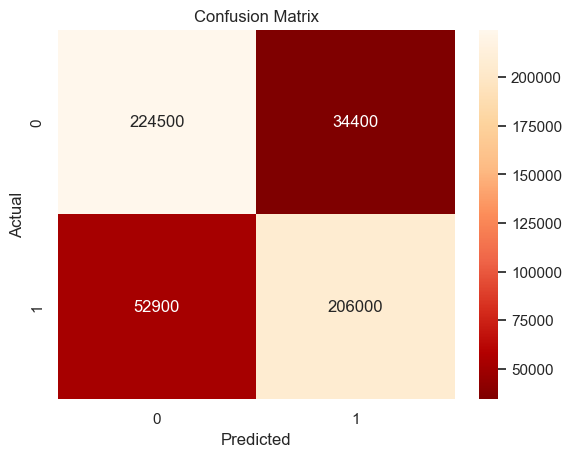

In [70]:
Confusion_Matrix_AB = confusion_matrix ( Test_Y , Y_AB ) * 100

sns.heatmap ( Confusion_Matrix_AB , annot = True , fmt='.0f' , cmap = 'OrRd_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )


In [71]:
# Predict the classes for the training set using KNN classifier

train_predictions = AB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = AB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 99.97678737233055

Test Accuracy >> 83.14020857473928


In [72]:
# Create a Gradient Boosting Classifier object

GB = GradientBoostingClassifier( )


# Define the hyperparameter grid for tuning

Parameters = {
    
    'learning_rate': [0.1, 0.001],
    
    'n_estimators': [200, 500],
    
    'max_depth': [3 , 5]
    
}

# Perform grid search cross-validation to find the best hyperparameters

grid_search = GridSearchCV ( GB , Parameters )

grid_search.fit ( Train_X , Train_Y )


# Print the best hyperparameters and the corresponding accuracy score

print("Best Hyperparameters: ", grid_search.best_params_)

print("\nBest Accuracy Score: ", grid_search.best_score_)

Params = grid_search.best_params_

# Evaluate the model with the best hyperparameters on the test set

best_model = grid_search.best_estimator_

accuracy = best_model.score( Test_X, Test_Y )

print("\nTest Accuracy: ", accuracy)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Best Accuracy Score:  0.8366759517177345

Test Accuracy:  0.8389339513325609


In [73]:
# Create an Gradient Boosting classifier with obtained hyper parameters

GB = GradientBoostingClassifier ( **Params )


# Fit the AdaBoost classifier on the training data

GB.fit ( Train_X ,Train_Y )

# Make predictions on the test data using the trained AdaBoost classifier

Y_GB = GB.predict ( Test_X )

threshold = 0.333

Y_GB = GB.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_GB = accuracy_score( Test_Y , Y_GB ) * 100 

Precision_GB = precision_score ( Test_Y , Y_GB ) * 100 

Recall_GB = recall_score ( Test_Y , Y_GB ) * 100

F1_Score_GB = f1_score ( Test_Y , Y_GB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_GB , Precision_GB , Recall_GB , F1_Score_GB ) )

The performance metrics of the Test Data is : 

Accuracy = 82.50289687137891%

Precision = 80.65573770491802%

Recall = 85.51564310544612%

F1 Score = 83.01462317210348%


In [74]:
# Predict the classes for the training set using KNN classifier

train_predictions = GB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = GB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 84.45682451253482

Test Accuracy >> 83.91270760911549


Text(0.5, 1.0, 'Confusion Matrix')

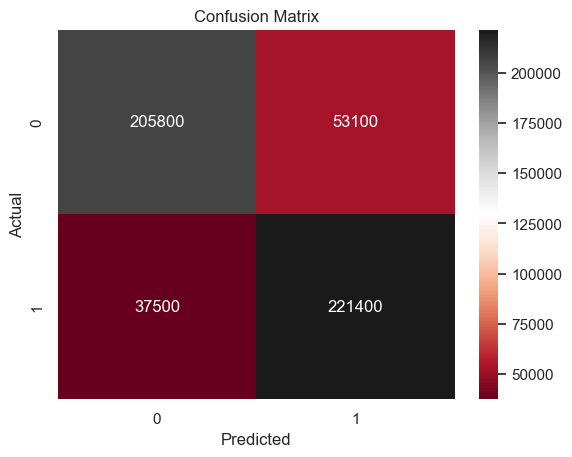

In [75]:
Confusion_Matrix_GB = confusion_matrix ( Test_Y , Y_GB ) * 100

sns.heatmap ( Confusion_Matrix_GB , annot = True , fmt='.0f' , cmap = 'RdGy' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [76]:
# Define the parameter grid for tuning

Parameters = {
    
    'n_estimators': [100, 200, 300],  # Number of trees
    
    'learning_rate': [ 0.5 , 0.1, 0.01, 0.001],  # Step size shrinkage
    
    'max_depth': [3, 5, 7]  # Maximum depth of a tree
    
}

# Initialize the XGBoost classifier

XGB = XGBClassifier( random_state = 42 )


# Perform grid search with cross-validation

grid_search = GridSearchCV( estimator = XGB, param_grid = Parameters, cv = 5 )

grid_search.fit(Train_X, Train_Y)


# Print the best parameters and best score

print("Best Parameters: ", grid_search.best_params_)

print("\nBest Score: ", grid_search.best_score_)

Params = grid_search.best_params_

# Evaluate the tuned model on the test set

accuracy = grid_search.best_estimator_.score( Test_X , Test_Y)

print("\nTest Set Accuracy: ", accuracy)


Best Parameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}

Best Score:  0.8367223769730734

Test Set Accuracy:  0.8366164542294322


In [77]:
# Create an Extreme Gradient Boosting classifier with obtained hyper parameters

XGB = GradientBoostingClassifier ( **Params )


# Fit the Extreme Gradient Boosting classifier on the training data

XGB.fit ( Train_X ,Train_Y )


# Make predictions on the test data using the trained Extreme Gradient Boosting##### TRAINING & TESTING

Y_XGB = XGB.predict ( Test_X )

threshold = 0.333

Y_XGB = XGB.predict_proba(Test_X)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_XGB = accuracy_score( Test_Y , Y_XGB ) * 100 

Precision_XGB = precision_score ( Test_Y , Y_XGB ) * 100 

Recall_XGB = recall_score ( Test_Y , Y_XGB ) * 100

F1_Score_XGB = f1_score ( Test_Y , Y_XGB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_XGB , Precision_XGB , Recall_XGB , F1_Score_XGB ) )

The performance metrics of the Test Data is : 

Accuracy = 82.61877172653534%

Precision = 80.21466905187835%

Recall = 86.5971417535728%

F1 Score = 83.28380386329867%


Text(0.5, 1.0, 'Confusion Matrix')

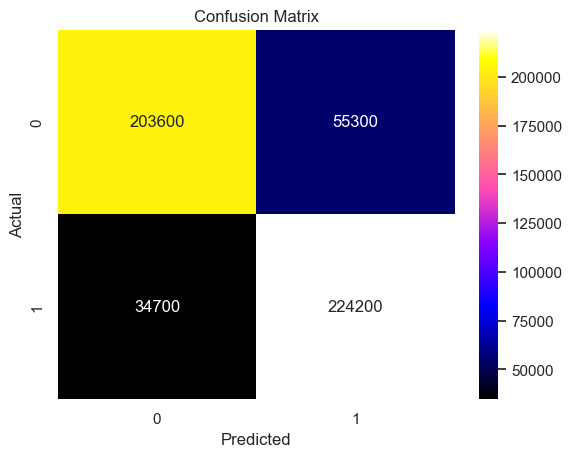

In [78]:
Confusion_Matrix_XGB = confusion_matrix ( Test_Y , Y_XGB ) * 100

sns.heatmap ( Confusion_Matrix_XGB , annot = True , fmt='.0f' , cmap = 'gnuplot2' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [79]:
# Predict the classes for the training set using KNN classifier

train_predictions = XGB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = XGB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 86.016713091922

Test Accuracy >> 83.42989571263037


In [80]:
# Define the parameter grid for tuning

Parameters = {
    
    'learning_rate': [0.01, 0.1, 0.5],
    
    'depth': [4, 6, 8],
    
    'l2_leaf_reg': [1, 3, 5]
    
}

# Create a CatBoost classifier

CB = CatBoostClassifier(  )


# Perform grid search with cross-validation

grid_search = GridSearchCV ( estimator = CB, param_grid = Parameters, cv = 5 )

grid_search.fit ( Train_X, Train_Y )


# Print the best parameters and best score

print("Best Parameters: ", grid_search.best_params_)

print("\nBest Score: ", grid_search.best_score_)


# Evaluate the best model on the test set

best_model = grid_search.best_estimator_

Params = grid_search.best_params_

accuracy = best_model.score( Test_X, Test_Y )

print("\nTest Accuracy: ", accuracy)


0:	learn: 0.6859693	total: 149ms	remaining: 2m 28s
1:	learn: 0.6790018	total: 154ms	remaining: 1m 16s
2:	learn: 0.6720853	total: 158ms	remaining: 52.6s
3:	learn: 0.6652461	total: 163ms	remaining: 40.6s
4:	learn: 0.6589403	total: 168ms	remaining: 33.4s
5:	learn: 0.6525548	total: 173ms	remaining: 28.6s
6:	learn: 0.6465730	total: 177ms	remaining: 25.1s
7:	learn: 0.6411906	total: 183ms	remaining: 22.7s
8:	learn: 0.6361174	total: 188ms	remaining: 20.7s
9:	learn: 0.6302699	total: 192ms	remaining: 19s
10:	learn: 0.6248206	total: 197ms	remaining: 17.7s
11:	learn: 0.6192031	total: 202ms	remaining: 16.6s
12:	learn: 0.6148387	total: 207ms	remaining: 15.8s
13:	learn: 0.6095590	total: 212ms	remaining: 14.9s
14:	learn: 0.6044289	total: 217ms	remaining: 14.3s
15:	learn: 0.5994775	total: 222ms	remaining: 13.7s
16:	learn: 0.5946914	total: 228ms	remaining: 13.2s
17:	learn: 0.5898571	total: 233ms	remaining: 12.7s
18:	learn: 0.5852290	total: 237ms	remaining: 12.2s
19:	learn: 0.5808059	total: 241ms	remaini

In [81]:
# Create an Categorical Boosting classifier with obtained hyper parameters

CB = CatBoostClassifier ( **Params )


# Fit the Categorical Boosting classifier on the training data

CB.fit ( Train_X ,Train_Y )


# Make predictions on the test data using the trained Categorical Boosting##### TRAINING & TESTING classifier

Y_CB = CB.predict ( Test_X )


# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 

Accuracy_CB = accuracy_score( Test_Y , Y_CB ) * 100 

Precision_CB = precision_score ( Test_Y , Y_CB ) * 100 

Recall_CB = recall_score ( Test_Y , Y_CB ) * 100

F1_Score_CB = f1_score ( Test_Y , Y_CB ) * 100


print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_CB , Precision_CB , Recall_CB , F1_Score_CB ) )

0:	learn: 0.6858228	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6786979	total: 26.3ms	remaining: 13.1s
2:	learn: 0.6716172	total: 36.8ms	remaining: 12.2s
3:	learn: 0.6648274	total: 49.1ms	remaining: 12.2s
4:	learn: 0.6579882	total: 59.9ms	remaining: 11.9s
5:	learn: 0.6513998	total: 71.2ms	remaining: 11.8s
6:	learn: 0.6448253	total: 82.5ms	remaining: 11.7s
7:	learn: 0.6384704	total: 93.4ms	remaining: 11.6s
8:	learn: 0.6323285	total: 104ms	remaining: 11.4s
9:	learn: 0.6263934	total: 113ms	remaining: 11.2s
10:	learn: 0.6212413	total: 123ms	remaining: 11.1s
11:	learn: 0.6155988	total: 133ms	remaining: 10.9s
12:	learn: 0.6099521	total: 142ms	remaining: 10.8s
13:	learn: 0.6047646	total: 151ms	remaining: 10.6s
14:	learn: 0.5993796	total: 160ms	remaining: 10.5s
15:	learn: 0.5943628	total: 170ms	remaining: 10.4s
16:	learn: 0.5892612	total: 180ms	remaining: 10.4s
17:	learn: 0.5843021	total: 189ms	remaining: 10.3s
18:	learn: 0.5794465	total: 199ms	remaining: 10.3s
19:	learn: 0.5749160	total: 209ms

Text(0.5, 1.0, 'Confusion Matrix')

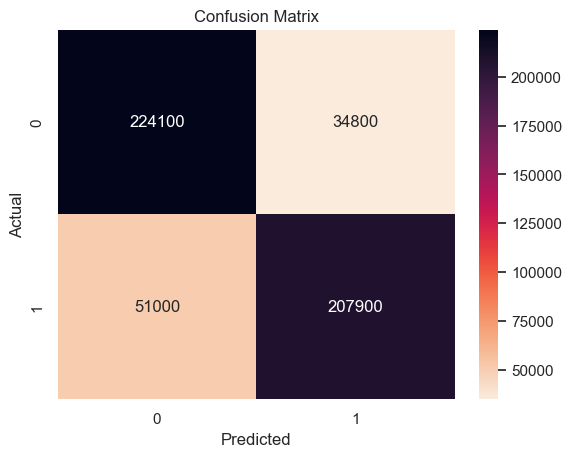

In [82]:
Confusion_Matrix_CB = confusion_matrix ( Test_Y , Y_CB ) * 100

sns.heatmap ( Confusion_Matrix_CB , annot = True , fmt='.0f' , cmap = 'rocket_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )

In [83]:
# Predict the classes for the training set using KNN classifier

train_predictions = CB.predict(Train_X)


# Predict the classes for the test set using KNN classifier

test_predictions = CB.predict(Test_X)


# Calculate the accuracy of the model on the training set

train_accuracy = accuracy_score(Train_Y, train_predictions) * 100


# Calculate the accuracy of the model on the test set

test_accuracy = accuracy_score(Test_Y, test_predictions) * 100


print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 84.43825441039927

Test Accuracy >> 83.42989571263037


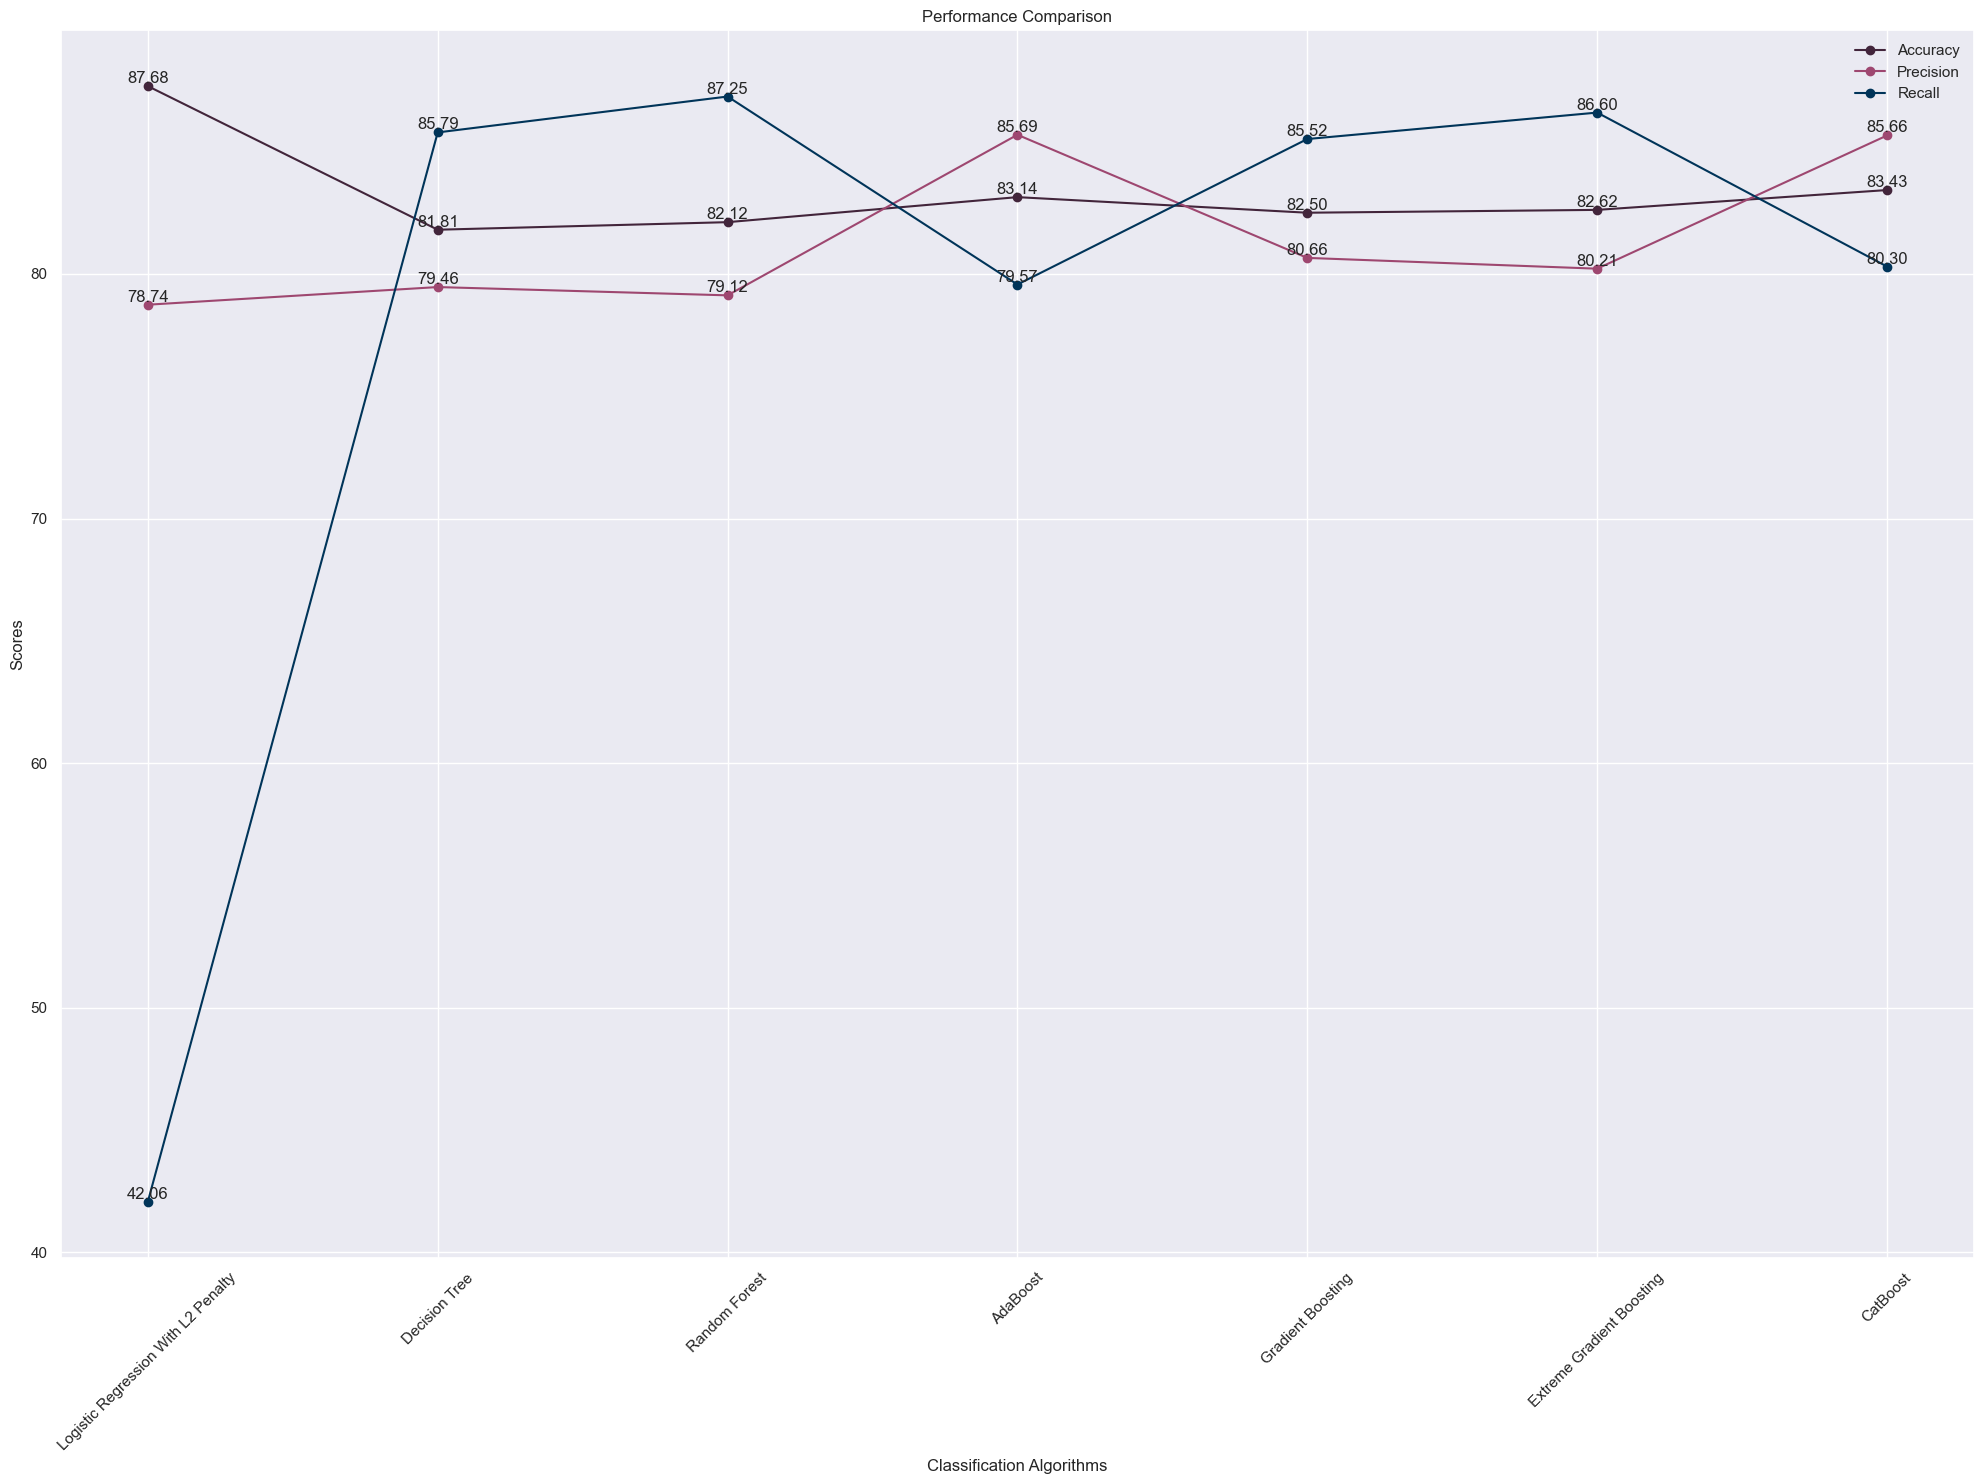

In [86]:
# Classification algorithm names (Removed KNN since it wasn't trained)
algorithm_names = ['Logistic Regression With L2 Penalty', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Extreme Gradient Boosting', 'CatBoost']

# Accuracy scores
accuracy_scores = [Accuracy_Lr, Accuracy_DT, Accuracy_RF, Accuracy_AB, Accuracy_GB, Accuracy_XGB, Accuracy_CB]

# Precision scores
precision_scores = [Precision_Lr, Precision_DT, Precision_RF, Precision_AB, Precision_GB, Precision_XGB, Precision_CB]

# Recall scores
recall_scores = [Recall_Lr, Recall_DT, Recall_RF, Recall_AB, Recall_GB, Recall_XGB, Recall_CB]

# Plotting the scores
plt.figure(figsize=(20, 15))

# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label='Accuracy', marker='o', color='#42253B')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')

# Precision scores plot
plt.plot(algorithm_names, precision_scores, label='Precision', marker='o', color='#9E4770')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], precision_scores[i], f'{precision_scores[i]:.2f}', ha='center', va='bottom')

# Recall scores plot
plt.plot(algorithm_names, recall_scores, label='Recall', marker='o', color='#003459')
for i in range(len(algorithm_names)):
    plt.text(algorithm_names[i], recall_scores[i], f'{recall_scores[i]:.2f}', ha='center', va='bottom')

# Labeling the axes and title
plt.xlabel('Classification Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison')

# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjusting layout to prevent label cutoff
plt.tight_layout()

# Displaying the plot
plt.show()

In [87]:
Performance = pd.DataFrame ( index = algorithm_names )

Performance [ "Accuracy" ] = accuracy_scores 

Performance [ "Precision" ] = precision_scores

Performance [ "Recall" ] = recall_scores

Performance

Accuracy  Precision     Recall
Logistic Regression With L2 Penalty  87.679418  78.741866  42.062572
Decision Tree                        81.807648  79.463327  85.786018
Random Forest                        82.116647  79.124343  87.253766
AdaBoost                             83.140209  85.690516  79.567401
Gradient Boosting                    82.502897  80.655738  85.515643
Extreme Gradient Boosting            82.618772  80.214669  86.597142
CatBoost                             83.429896  85.661310  80.301275

In [89]:
from sklearn.metrics import roc_curve

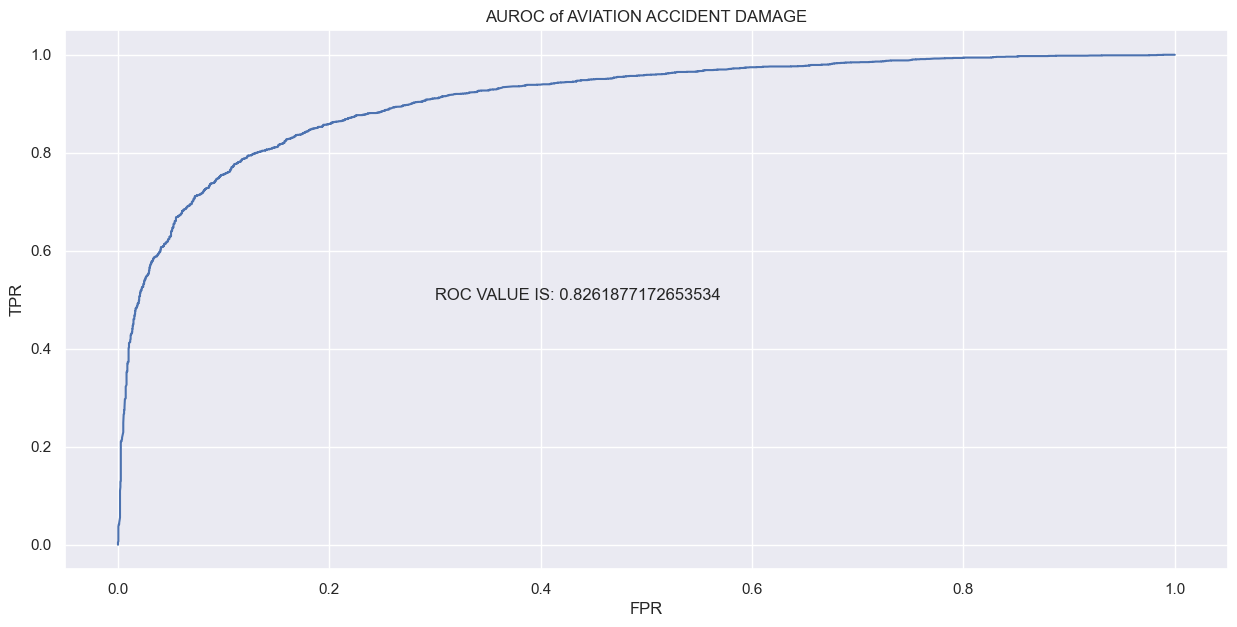

In [ ]:
# Calculate AUROC score using XGBoost
AUROC_Score = roc_auc_score(Test_Y, Y_XGB)  # Use Y_XGB instead of Y_RF

# Get XGBoost probabilities for ROC curve  
Predicted_Prob = XGB.predict_proba(Test_X)
FPR, TPR, Threshold = roc_curve(Test_Y, Predicted_Prob[:, 1])


# Plot the ROC curve using FPR and TPR

plt.style.use( "seaborn-v0_8-dark" )

plt.figure ( figsize = ( 15 , 7 ) )

sns.set( style = 'darkgrid' )

plt.plot( FPR , TPR )


# Set the x-axis label

plt.xlabel( "FPR" )


# Set the y-axis label

plt.ylabel( "TPR" )


# Set the title of the plot

plt.title( "AUROC of AVIATION ACCIDENT DAMAGE" )


# Add text to the plot indicating the AUROC score

plt.text( x = 0.3, y = 0.5, s = "ROC VALUE IS: {}".format ( AUROC_Score ) )

plt.show ( )

In [ ]:
# Calculate AUROC score using Random Forest
AUROC_Score = roc_auc_score(Test_Y, Y_RF)

# Get Random Forest probabilities for ROC curve
Predicted_Prob = RF.predict_proba(Test_X)  # Use RF instead of XGB
FPR, TPR, Threshold = roc_curve(Test_Y, Predicted_Prob[:, 1])